In [1]:
import os
from pathlib import Path
import torch
import matplotlib.pyplot as plt
from diffusion.model import Model

In [2]:
MODEL_PATH = Path("../model")

In [3]:
model = Model()
model.load_state_dict(torch.load(MODEL_PATH.joinpath(os.listdir(MODEL_PATH, )[-1])))
model.to("cuda");

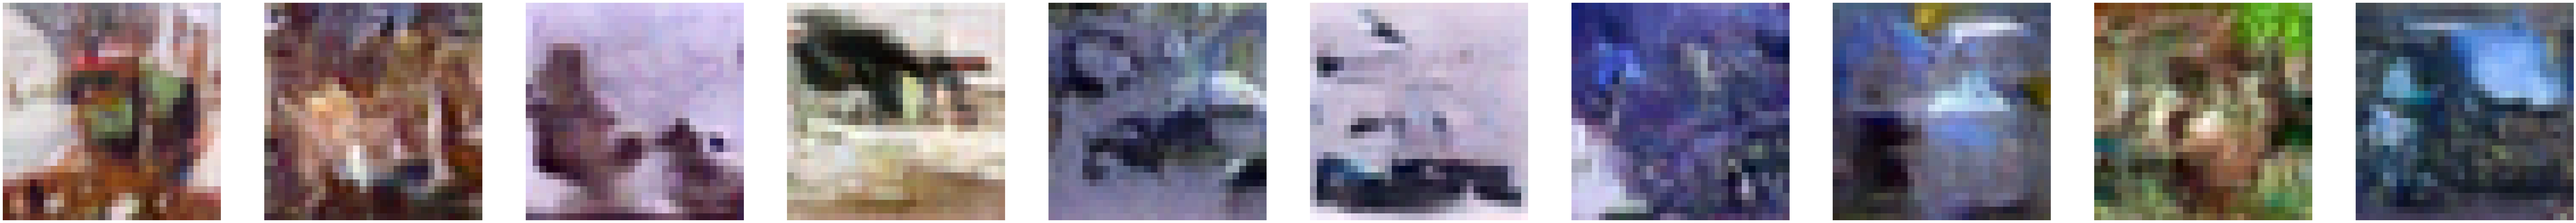

In [4]:
fig = plt.figure(figsize=(120,60))
n = 10
for i in range(n):
    img = model.infer(3, 32, 32)
    plt.subplot(1, n, i+1)
    plt.imshow(img)
    plt.axis('off')